# Outlier Detection and Handling 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Loan%20Eligibility%20Prediction.csv')

In [3]:
df.head(3)

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y


In [4]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [6]:
df.drop(columns='Customer_ID', axis=1, inplace=True)

In [7]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y


# Outlier Detection using boxplot 

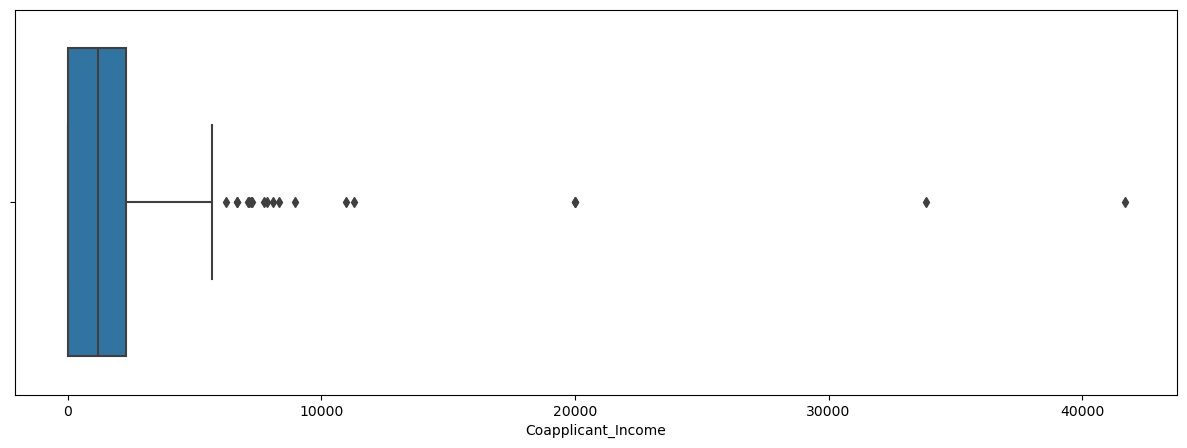

In [9]:
plt.figure(figsize = (15,5))
sns.boxplot(x='Coapplicant_Income',data =df)
plt.show()

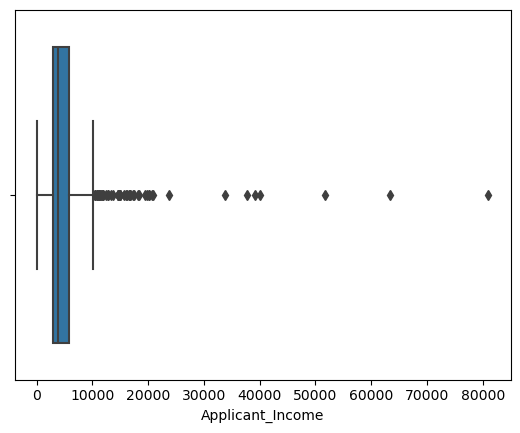

In [10]:
sns.boxplot(x='Applicant_Income',data = df)
plt.show()

# Outlier Removal 
 Outliers can be removed using 2 methods :
- IQR (Inter quartile range)
- Z-score (Standar score)

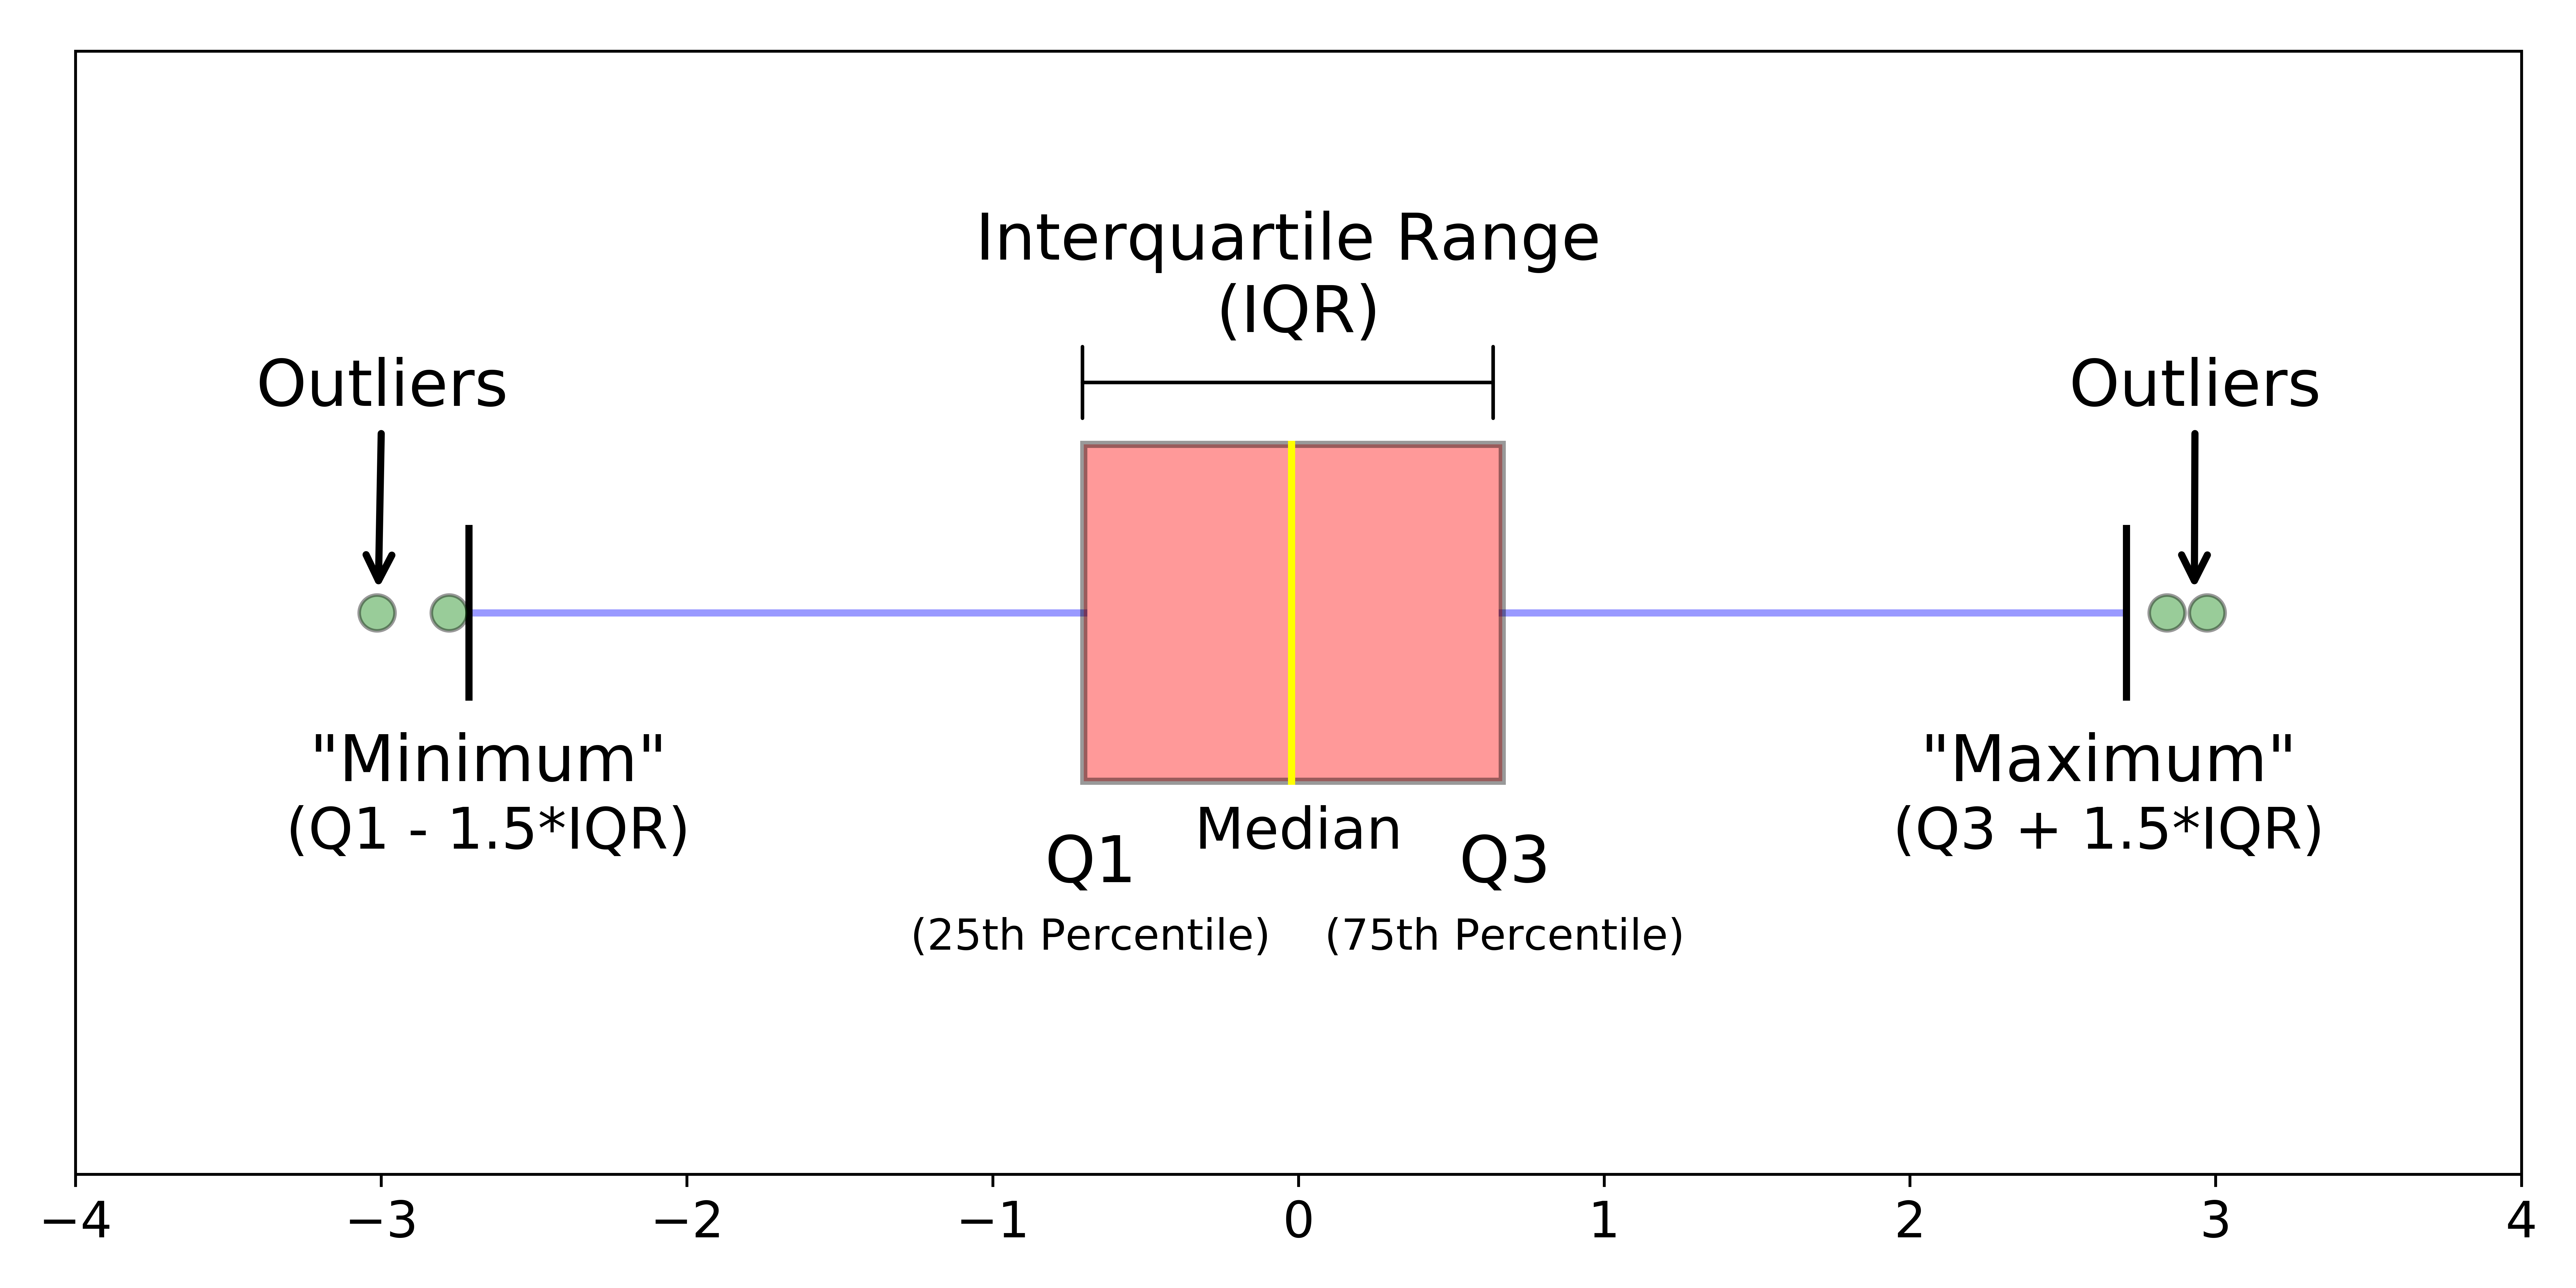

In [11]:
df.shape

(614, 12)

In [12]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## IQR Method

In [13]:
q1 = df['Coapplicant_Income'].quantile(0.25)
q3 = df['Coapplicant_Income'].quantile(0.75)

In [14]:
IQR = q3-q1

In [15]:
min_range  = q1 - (1.5*IQR)
max_range  = q3 + (1.5*IQR)

In [16]:
min_range,max_range

(-3445.875, 5743.125)

In [17]:
new_df=df[df['Coapplicant_Income']<=max_range]

In [18]:
new_df.shape

(596, 12)

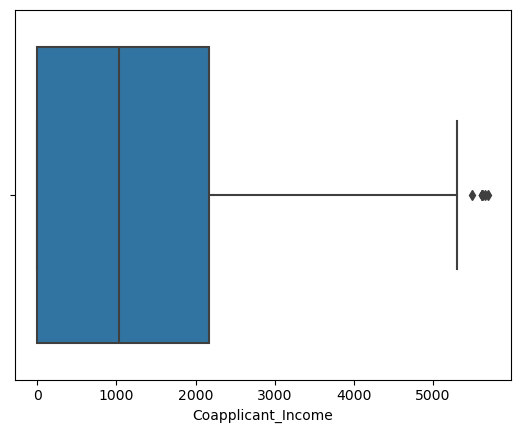

In [19]:
# checking outliers after IQR method
sns.boxplot(x='Coapplicant_Income',data = new_df)
plt.show()

Note : As we can see there are some outliers left , this level of outliers are acceptable 

## Z-score Method
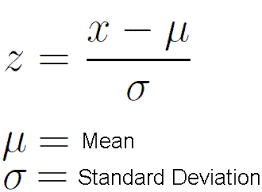

In [20]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y


In [21]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: xlabel='Coapplicant_Income'>

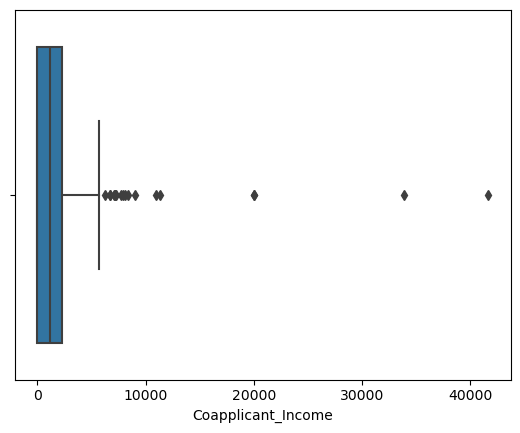

In [23]:
sns.boxplot(x='Coapplicant_Income',data =df)

<Axes: xlabel='Coapplicant_Income', ylabel='Density'>

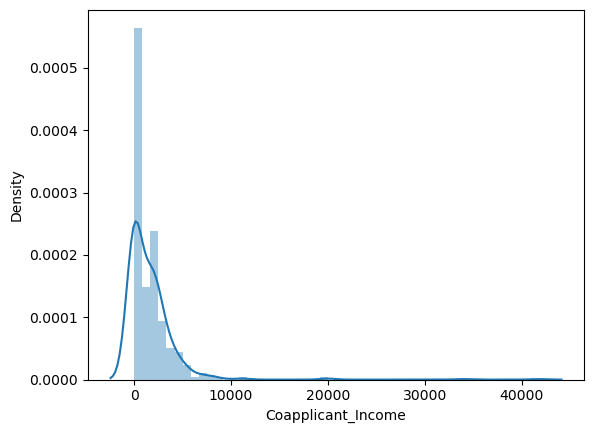

In [24]:
sns.distplot(df['Coapplicant_Income'])

In [25]:
# Directly Applying formula
min = df['Coapplicant_Income'].mean() - (3*df['Coapplicant_Income'].std())
max = df['Coapplicant_Income'].mean() + (3*df['Coapplicant_Income'].std())

In [26]:
min,max

(-7157.499309645476, 10399.990905699678)

In [27]:
new_data = df[df['Coapplicant_Income']<= max] 

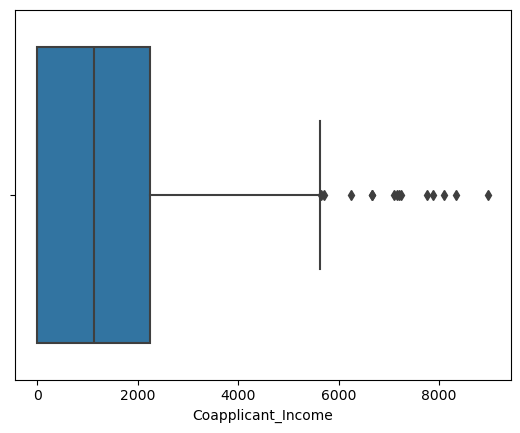

In [28]:
sns.boxplot(x='Coapplicant_Income',data = new_data)
plt.show()

In [29]:
z_score = (df['Coapplicant_Income'] - df['Coapplicant_Income'].mean())/(df['Coapplicant_Income'].std())

In [30]:
df['z_score'] = z_score

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N,-0.554036
1,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y,-0.182912
2,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y,-0.554036
3,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y,-0.554036
4,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y,-0.201366


In [32]:
df[df['z_score']<3]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N,-0.554036
1,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y,-0.182912
2,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y,-0.554036
3,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y,-0.554036
4,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y,-0.201366
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N,-0.006235
610,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N,0.159164
611,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N,-0.554036
612,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y,0.257584


In [33]:
new_data.shape

(608, 12)

 From the above we can conclude that z_score method and the direct method gives the same result i.e 608 rows